In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

/home/vinicius/.local/lib/python3.10/site-packages/seaborn/_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.5)
  from scipy.stats import gaussian_kde


# Preparando dados

In [1]:
DATA_PATH = "./data"
FILE_NAME = "stackoverflow.csv"

In [43]:
pd.set_option('display.max_columns', None)
df = pd.read_csv(f"{DATA_PATH}/{FILE_NAME}")
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

In [45]:
# from math import isnan

TOP10_COUNTRIES = ["United States of America", "Germany", "India", "United Kingdom of Great Britain and Northern Ireland", "Canada", "France", "Poland", "Netherlands", "Australia", "Brazil", "Italy", "Spain", "Sweden", "Switzerland", "Russian Federation", "Austria", "Israel", "Belgium", "Turkey", "Ukraine", "Denmark", "Romania", "Portugal", "Norway", "Finland", "New Zealand", "China", "Greece"]
PODER_DE_COMPRA_CONVERSAO = {
    "United States of America": (1, 139.7),
    "Germany": (0.7, 131.9),
    "India": (20.22, 216.9),
    "United Kingdom of Great Britain and Northern Ireland": (0.67, 142.7),
    "Canada": (1.17, 134.9),
    "France": (0.67, 124),
    "Poland": (1.88, 158.2),
    "Netherlands": (0.74, 137.7),
    "Australia": (1.39, 139.9),
    "Brazil": (2.44, 213.9),
    "Italy": (0.60, 128.6),
    "Spain": (0.57, 128.0),
    "Sweden": (8.51, 133.5),
    "Switzerland": (0.97, 104.4),
    "Russian Federation": (26.68, 199.4),
    "Austria": (0.71, 143.9),
    "Israel": (3.59, 118.8),
    "Belgium": (0.70, 137.8),
    "Turkey": (6.97, 834.6),
    "Ukraine": (10.52, 429.2),
    "Denmark": (6.11, 125.6),
    "Romania": (1.76, 167.7),
    "Portugal": (0.52, 126.0),
    "Norway": (8.89, 140.7),
    "Finland": (0.76, 131.0),
    "New Zealand": (1.46, 136.9),
    "China": (3.64, 132.2),
    "Greece": (0.52, 115.6)
}

def obtem_poder_de_compra(row):
    vars = PODER_DE_COMPRA_CONVERSAO[row["Country"]]
    return (row["ConvertedCompYearly"] * vars[1]) / (vars[0] * 100)

def concatena_stacks(row):
    lang = row["LanguageHaveWorkedWith"]
    db = row["DatabaseHaveWorkedWith"]
    platform = row["PlatformHaveWorkedWith"]
    misc = row["MiscTechHaveWorkedWith"]
    
    languages = np.char.split("" if pd.isnull(lang) else lang, sep=';').tolist()
    # dbs = np.char.split("" if pd.isnull(db) else db, sep=';').tolist()
    # platforms = np.char.split("" if pd.isnull(platform) else platform, sep=';').tolist()
    # miscs = np.char.split("" if pd.isnull(misc) else misc, sep=';').tolist()
    
    # concatenated = languages + dbs + platforms + miscs
    concatenated = languages
    filtered = filter(lambda item: item != "", concatenated)

    return list(filtered)

# 
top10_df = df[df["Country"].isin(TOP10_COUNTRIES)]
top10_df = top10_df[["Country", "LanguageHaveWorkedWith", "DatabaseHaveWorkedWith", "PlatformHaveWorkedWith", "WebframeHaveWorkedWith", "MiscTechHaveWorkedWith", "ConvertedCompYearly"]]
top10_df = top10_df.dropna(subset=["ConvertedCompYearly"])
top10_df["poder_de_compra"] = top10_df.apply(obtem_poder_de_compra,axis=1)
top10_df["stacks"] = top10_df.apply(concatena_stacks, axis=1)
top10_df[["poder_de_compra", "stacks"]]

,poder_de_compra,stacks
1,398145.000000,"[HTML/CSS, JavaScript, Python]"
2,349250.000000,"[Bash/Shell (all shells), Go]"
3,217932.000000,"[Bash/Shell (all shells), HTML/CSS, JavaScript..."
5,206229.188060,"[Bash/Shell (all shells), HTML/CSS, JavaScript..."
6,188595.000000,"[Ada, Clojure, Elixir, Go, HTML/CSS, Java, Jav..."
...,...,...
89158,8311.355464,[TypeScript]
89162,44462.270902,"[C, C++]"
89167,1689.717507,"[Dart, HTML/CSS, JavaScript, TypeScript]"
89170,118917.850746,"[C#, F#, HTML/CSS, JavaScript, SQL, TypeScript]"


# Frequent Pattern

In [5]:
def isthereempty(stack):
    return stack == ""

# top10_df["stacks"].filter(lambda stacks: len(filter(isthereempty, stacks)) != 0, axis=1)
filtered_df = top10_df[top10_df['stacks'].apply(lambda stacks: any(isthereempty(stack) for stack in stacks))]
filtered_df

,Country,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ConvertedCompYearly,poder_de_compra,stacks


<AxesSubplot:>

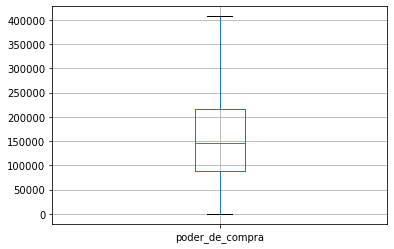

In [6]:
top10_df.boxplot(column="poder_de_compra", showfliers=False)

In [7]:
threshold_25 = top10_df["poder_de_compra"].quantile(0.25)
threshold_50 = top10_df["poder_de_compra"].quantile(0.5)
threshold_75 = top10_df["poder_de_compra"].quantile(0.75)
threshold_25, threshold_50, threshold_75

(89187.46268656716, 145417.6895522388, 216535.0)

In [8]:
df_25 = top10_df[top10_df["poder_de_compra"] <= threshold_25]
df_50 = top10_df[(top10_df["poder_de_compra"] > threshold_25) & (top10_df["poder_de_compra"] <= threshold_50)]
df_75 = top10_df[(top10_df["poder_de_compra"] > threshold_50) & (top10_df["poder_de_compra"] <= threshold_75)]
df_100 = top10_df[top10_df["poder_de_compra"] > threshold_75]
df_list = {"25":df_25,"50":df_50,"75": df_75, "100": df_100}

#### Registrando

In [9]:
# unique_elements =  np.unique(top10_df["stacks"])
unique_elements  = top10_df["stacks"].explode().unique()
unique_elements.shape

(143,)

In [10]:
STACKS_LEN = unique_elements.shape[0]

final_map = {}
size = 1

for i in range(STACKS_LEN):
    final_map[unique_elements[i]] = size
    size += 1

final_map

{'HTML/CSS': 1,
 'JavaScript': 2,
 'Python': 3,
 'Supabase': 4,
 'Amazon Web Services (AWS)': 5,
 'Netlify': 6,
 'Vercel': 7,
 'Electron': 8,
 'React Native': 9,
 'Tauri': 10,
 'Bash/Shell (all shells)': 11,
 'Go': 12,
 'Google Cloud': 13,
 'OpenStack': 14,
 'VMware': 15,
 'Vultr': 16,
 'PHP': 17,
 'Ruby': 18,
 'SQL': 19,
 'TypeScript': 20,
 'PostgreSQL': 21,
 'Redis': 22,
 'Cloudflare': 23,
 'Heroku': 24,
 'BigQuery': 25,
 'Cloud Firestore': 26,
 'Ada': 27,
 'Clojure': 28,
 'Elixir': 29,
 'Java': 30,
 'Lisp': 31,
 'OCaml': 32,
 'Raku': 33,
 'Scala': 34,
 'Swift': 35,
 'Zig': 36,
 'MariaDB': 37,
 'Microsoft SQL Server': 38,
 'MySQL': 39,
 'SQLite': 40,
 'Digital Ocean': 41,
 'RabbitMQ': 42,
 'Spring Framework': 43,
 'Rust': 44,
 'Dynamodb': 45,
 'MongoDB': 46,
 'Fly.io': 47,
 'NumPy': 48,
 'Pandas': 49,
 'Scikit-Learn': 50,
 'TensorFlow': 51,
 'C#': 52,
 'Kotlin': 53,
 'PowerShell': 54,
 'Cosmos DB': 55,
 'Microsoft Azure': 56,
 '.NET (5+) ': 57,
 'Solidity': 58,
 'Elasticsearch': 59,


In [11]:
OUTPUT_PATH = "./out/stackoverflow"
FILE_NAME = "stacks"

In [13]:
import subprocess

for quartile, df in df_list.items():
    casted_file = f"{OUTPUT_PATH}/{FILE_NAME}_{quartile}.txt"
    with open(casted_file, 'w') as file:
        file.write("@CONVERTED_FROM_TEXT\n")
        # Header
        for (key, item) in final_map.items():
            file.write(f"@ITEM={item}={key},\n")
        # Sequences
        for row in df.itertuples():
            casted_items = map(lambda x: str(final_map[x]), row.stacks)
            file.write(f"{' '.join(casted_items)}\n")
    
        subprocess.run(["java", "-jar", "./HighUtilityItemsetMining/spmf.jar", "run", "FPGrowth_itemsets", f"{casted_file}",  f"{OUTPUT_PATH}/output_{quartile}.txt","20%"])

>/home/vinicius/UFMG/8p/AD/TP/HighUtilityItemsetMining/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 7399
 Max memory usage: 13.266372680664062 mb 
 Frequent itemsets count : 50
 Total time ~ 161 ms
Post-processing to show result in terms of string values.
Post-processing completed.
>/home/vinicius/UFMG/8p/AD/TP/HighUtilityItemsetMining/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 7560
 Max memory usage: 12.695526123046875 mb 
 Frequent itemsets count : 52
 Total time ~ 179 ms
Post-processing to show result in terms of string values.
Post-processing completed.
>/home/vinicius/UFMG/8p/AD/TP/HighUtilityItemsetMining/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 7411
 Max memory usage: 12.9423828125 mb 
 Frequent itemsets count : 58
 Total time ~ 160 ms
Post-processing to show result in terms of string values.
Post-processing completed.


# Subgroup Discovery

In [47]:
df.sample(2)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
40600,40601,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Formal documentation provided by the owner of ...,NaN,10,1,"Developer, full-stack",20 to 99 employees,I have little or no influence,NaN,Ask developers I know/work with;Visit develope...,France,EUR European Euro,40000.0,Assembly;Bash/Shell (all shells);C;C#;C++;HTML...,Kotlin;Lua;Ruby,Firebase Realtime Database;MariaDB;Microsoft S...,NaN,Firebase;Google Cloud;Microsoft Azure;VMware,NaN,ASP.NET;Nuxt.js;Symfony;Vue.js;WordPress,Angular;ASP.NET,NumPy;OpenGL;Pandas;Quarkus;RabbitMQ;Spring Fr...,Apache Kafka;Quarkus;RabbitMQ;React Native,APT;Docker;Gradle;Kubernetes;Maven (build tool...,NaN,Android Studio;Eclipse;IntelliJ IDEA;Jupyter N...,IntelliJ IDEA,Android;iOS;Windows,Ubuntu;Windows,NaN,NaN,Discord;Google Meet;Microsoft Teams;Skype;What...,NaN,ChatGPT,NaN,NaN,NaN,Stack Overflow;Stack Exchange,Multiple times per day,Yes,A few times per month or weekly,"Yes, somewhat",NaN,"No, but I plan to soon",Indifferent,NaN,Somewhat trust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,42836.0
18958,18959,I agree,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Formal documentation provided by the owner of ...,NaN,11,4,"Developer, full-stack",10 to 19 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,Germany,EUR European Euro,50000.0,C#;PHP,C#;Delphi,MySQL;PostgreSQL;SQLite,PostgreSQL;SQLite,Hetzner,Hetzner,Blazor,Blazor,.NET (5+),.NET (5+),Composer;Docker;NuGet;Visual Studio Solution,Composer;Docker;Kubernetes;NuGet;Visual Studio...,Vim;Visual Studio;Visual Studio Code,Vim;Visual Studio;Visual Studio Code,Android;Ubuntu;Windows;Windows Subsystem for L...,Android;Ubuntu;Windows;Windows Subsystem for L...,Jira;Monday.com,NaN,Discord;Signal,Discord;Signal,ChatGPT,NaN,NaN,NaN,Stack Overflow;Stack Exchange;Stack Overflow f...,Daily or almost daily,Yes,A few times per week,Neutral,It should check the formatting of code and sho...,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,4.0,Agree,Neither agree nor disagree,Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree 

In [48]:
dev_df = df[["DevType"]]
dev_df = dev_df.dropna()
dev_df.sample(10)

,DevType
57460,Engineering manager
51663,"Developer, back-end"
49333,"Developer, full-stack"
79363,Student
82696,"Developer, full-stack"
65016,"Engineer, data"
39290,Data or business analyst
77535,Other (please specify):
67974,"Developer, full-stack"
51361,Educator


In [49]:
def get_raw_dev_type(row):
    raw = row["DevType"]
    return raw.replace('Developer, ', '')

type_df = dev_df[dev_df["DevType"].str.startswith("Developer")]
type_df = type_df.apply(get_raw_dev_type, axis=1)
type_df.unique(), type_df.unique().__len__()

(array(['back-end', 'front-end', 'full-stack',
        'desktop or enterprise applications', 'QA or test', 'mobile',
        'embedded applications or devices', 'game or graphics',
        'Developer Experience', 'Developer Advocate'], dtype=object),
 10)

In [50]:
df["stacks"] = top10_df.apply(concatena_stacks, axis=1)
unique_stacks = df["stacks"].explode().unique()
unique_stacks, unique_stacks.shape

(array([nan, 'HTML/CSS', 'JavaScript', 'Python', 'Bash/Shell (all shells)',
        'Go', 'PHP', 'Ruby', 'SQL', 'TypeScript', 'Ada', 'Clojure',
        'Elixir', 'Java', 'Lisp', 'OCaml', 'Raku', 'Scala', 'Swift', 'Zig',
        'Rust', 'C#', 'PowerShell', 'Kotlin', 'Solidity', 'C', 'C++',
        'Perl', 'Dart', 'Haskell', 'Delphi', 'Lua', 'VBA',
        'Visual Basic (.Net)', 'Groovy', 'GDScript', 'F#', 'R',
        'Objective-C', 'APL', 'Assembly', 'Cobol', 'Fortran', 'Julia',
        'MATLAB', 'Prolog', 'Apex', 'Crystal', 'SAS', 'Erlang', 'Nim',
        'Flow'], dtype=object),
 (52,))

In [51]:
DEV_TYPE_BLACK_LIST = ["Student", "Designer"]

def cast_dev_type(row):
    _type = row["DevType"]
    if _type.startswith("Developer"):
        return get_raw_dev_type(row)
    if  _type == "Engineer, data":
        return "data-engineer"
    _type = _type.replace(' ', '-')
    _type = _type.replace(',', '')
    return _type

scaler = StandardScaler()

type10_df = df[df["Country"].isin(TOP10_COUNTRIES)]
type10_df = type10_df.dropna(subset=["ConvertedCompYearly", "DevType"])
type10_df["poder_de_compra"] = type10_df.apply(obtem_poder_de_compra,axis=1)
type10_df["poder_de_compra"] = scaler.fit_transform(type10_df[["poder_de_compra"]])
type10_df["FinalDevType"] = type10_df.apply(cast_dev_type, axis=1)
type10_df = type10_df[~type10_df["FinalDevType"].isin(DEV_TYPE_BLACK_LIST)]
type10_df = type10_df[["poder_de_compra", "FinalDevType", "stacks"]]
type10_df["FinalDevType"].unique(), type10_df["FinalDevType"].shape

(array(['Senior-Executive-(C-Suite-VP-etc.)', 'back-end', 'front-end',
        'full-stack', 'System-administrator', 'QA or test',
        'Data-scientist-or-machine-learning-specialist',
        'Data-or-business-analyst', 'Security-professional',
        'Research-&-Development-role', 'Database-administrator',
        'desktop or enterprise applications', 'data-engineer',
        'Product-manager', 'Cloud-infrastructure-engineer',
        'embedded applications or devices', 'Developer Experience',
        'Engineering-manager', 'Other-(please-specify):', 'mobile',
        'DevOps-specialist', 'Engineer-site-reliability',
        'Project-manager', 'Academic-researcher', 'Blockchain',
        'game or graphics', 'Developer Advocate', 'Hardware-Engineer',
        'Educator', 'Scientist', 'Marketing-or-sales-professional'],
       dtype=object),
 (39881,))

In [52]:
df_exploded = type10_df.explode(column='stacks')
df_one_hot = pd.get_dummies(df_exploded, columns=['stacks'])
df_one_hot = df_one_hot.groupby(level=0).sum()
merged_df = df_one_hot.join(type10_df, how="left", lsuffix='_left', rsuffix='_right')
merged_df = merged_df.drop(columns=['stacks', 'poder_de_compra_left'])

merged_df.sample(2)

/tmp/ipykernel_1613/2250264736.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_one_hot = df_one_hot.groupby(level=0).sum()


,stacks_APL,stacks_Ada,stacks_Apex,stacks_Assembly,stacks_Bash/Shell (all shells),stacks_C,stacks_C#,stacks_C++,stacks_Clojure,stacks_Cobol,stacks_Crystal,stacks_Dart,stacks_Delphi,stacks_Elixir,stacks_Erlang,stacks_F#,stacks_Flow,stacks_Fortran,stacks_GDScript,stacks_Go,stacks_Groovy,stacks_HTML/CSS,stacks_Haskell,stacks_Java,stacks_JavaScript,stacks_Julia,stacks_Kotlin,stacks_Lisp,stacks_Lua,stacks_MATLAB,stacks_Nim,stacks_OCaml,stacks_Objective-C,stacks_PHP,stacks_Perl,stacks_PowerShell,stacks_Prolog,stacks_Python,stacks_R,stacks_Raku,stacks_Ruby,stacks_Rust,stacks_SAS,stacks_SQL,stacks_Scala,stacks_Solidity,stacks_Swift,stacks_TypeScript,stacks_VBA,stacks_Visual Basic (.Net),stacks_Zig,poder_de_compra_right,FinalDevType
29941,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.141518,back-end
888,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.093387,full-stack


In [53]:
TYPE_OUTPUT_PATH = "./out/type.csv"

merged_df.to_csv(TYPE_OUTPUT_PATH, index=False)

/tmp/ipykernel_1613/3639633545.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(merged_df["poder_de_compra_right"], shade=True)


<AxesSubplot:xlabel='poder_de_compra_right', ylabel='Density'>

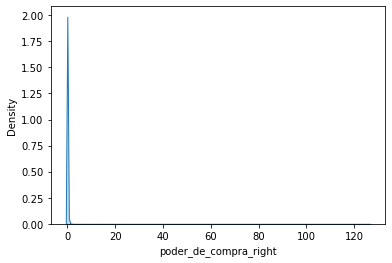

In [38]:
sns.kdeplot(merged_df["poder_de_compra_right"], shade=True)

/tmp/ipykernel_1613/2132862342.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(merged_df["poder_de_compra_right"], shade=True)


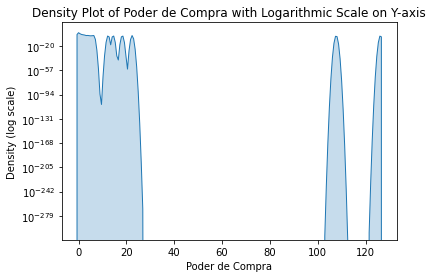

In [40]:
ax = sns.kdeplot(merged_df["poder_de_compra_right"], shade=True)
# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Add labels and title
plt.xlabel('Poder de Compra')
plt.ylabel('Density (log scale)')
plt.title('Density Plot of Poder de Compra with Logarithmic Scale on Y-axis')

# Show the plot
plt.show()

### Outras q tao errada

In [33]:
def plot_density_type(type, in_df):
    aaa_df = in_df[in_df["FinalDevType"] == type]
    sns.kdeplot(aaa_df["poder_de_compra"], shade=True)
    
def plot_log_density_type(type, in_df):
    aaa_df = in_df[in_df["FinalDevType"] == type]
    ax = sns.kdeplot(aaa_df["poder_de_compra"], shade=True)
    # Set y-axis to logarithmic scale
    ax.set_yscale('log')

    # Add labels and title
    plt.xlabel('Poder de Compra')
    plt.ylabel('Density (log scale)')
    plt.title('Density Plot of Poder de Compra with Logarithmic Scale on Y-axis')

    # Show the plot
    plt.show()

/tmp/ipykernel_2478/1800307463.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(type10_df["poder_de_compra"], shade=True)


<AxesSubplot:xlabel='poder_de_compra', ylabel='Density'>

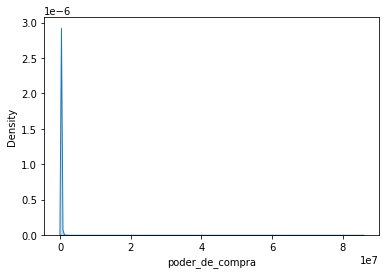

In [38]:
sns.kdeplot(type10_df["poder_de_compra"], shade=True)

/tmp/ipykernel_2478/2773101024.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(type10_df["poder_de_compra"], shade=True)


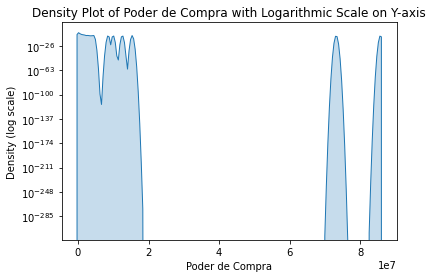

In [30]:
ax = sns.kdeplot(type10_df["poder_de_compra"], shade=True)
 # Set y-axis to logarithmic scale
ax.set_yscale('log')

# Add labels and title
plt.xlabel('Poder de Compra')
plt.ylabel('Density (log scale)')
plt.title('Density Plot of Poder de Compra with Logarithmic Scale on Y-axis')

# Show the plot
plt.show()

/tmp/ipykernel_2478/230169858.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(aaa_df["poder_de_compra"], shade=True)


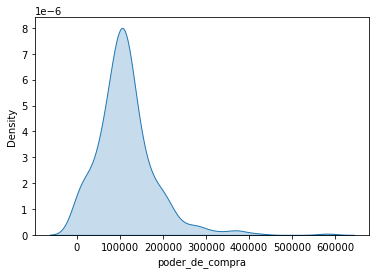

In [35]:
plot_density_type("Academic-researcher", type10_df)

/tmp/ipykernel_2478/3541173781.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(aaa_df["poder_de_compra"], shade=True)


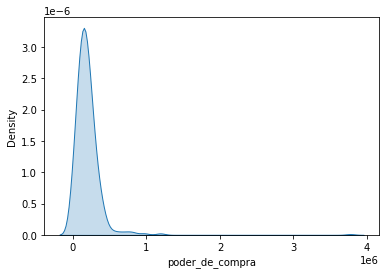

In [41]:
plot_density_type("Research-&-Development-role", type10_df)

/tmp/ipykernel_2478/3541173781.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(aaa_df["poder_de_compra"], shade=True)


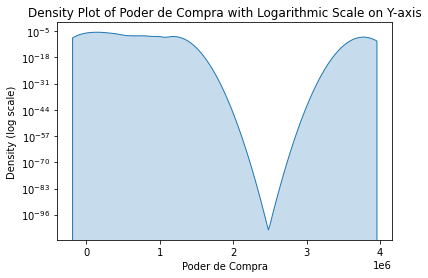

In [40]:
plot_log_density_type("Research-&-Development-role", type10_df)

In [43]:
type10_df[type10_df["poder_de_compra"] >= 2790000]

,poder_de_compra,FinalDevType
770,1.257300e+07,Data-scientist-or-machine-learning-specialist
5904,2.794000e+06,Other-(please-specify):
16666,3.352800e+06,Other-(please-specify):
25204,2.908354e+06,Senior-Executive-(C-Suite-VP-etc.)
32596,4.494728e+06,back-end
34996,8.572656e+06,full-stack
47797,9.979787e+06,full-stack
51182,3.771900e+06,Research-&-Development-role
53268,8.572657e+07,full-stack
56804,3.075907e+06,Engineer-site-reliability


/tmp/ipykernel_2478/3541173781.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(aaa_df["poder_de_compra"], shade=True)


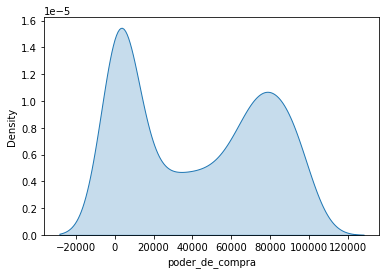

In [50]:
plot_density_type("front-end", type10_df[type10_df["poder_de_compra"] < 100000])

/tmp/ipykernel_2478/3541173781.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(aaa_df["poder_de_compra"], shade=True)


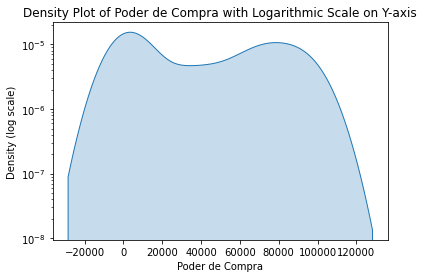

In [51]:
plot_log_density_type("front-end", type10_df[type10_df["poder_de_compra"] < 100000])

### 18/07/24 -  Resultados

In [125]:
def cleaned_conds(row):
    conds = row['Conditions'].split('AND')
    trimmed = list(map(lambda cond: cond.strip(), conds))
    ones = [item for item in trimmed if '0' not in item]
    if ones is None or ones.__len__() == 0:
        return None
    ones.sort()
    return " AND ".join(ones)

res_df = pd.read_csv("./out/30country_beam200_bin18_min100_<.csv", '\t')
res_df['filtered_conds'] = res_df.apply(cleaned_conds, axis =1)
res_df = res_df.dropna(subset=["filtered_conds"])
res_df

/tmp/ipykernel_1613/707939748.py:10: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  res_df = pd.read_csv("./out/30country_beam200_bin18_min100_<.csv", '\t')


,Nr.,Depth,Coverage,Quality,Average,St. Dev.,p-Value,Conditions,filtered_conds
0,1,4,217,18.348469,1.247210,12.541905,NaN,stacks_HTML/CSS = '1' AND stacks_Swift = '1' A...,stacks_HTML/CSS = '1' AND stacks_Swift = '1'
1,2,4,217,18.348469,1.247210,12.541905,NaN,stacks_Swift = '1' AND stacks_HTML/CSS = '1' A...,stacks_HTML/CSS = '1' AND stacks_Swift = '1'
2,3,4,217,18.348469,1.247210,12.541905,NaN,stacks_Swift = '1' AND stacks_TypeScript = '0'...,stacks_HTML/CSS = '1' AND stacks_Swift = '1'
3,4,4,217,18.348469,1.247210,12.541905,NaN,stacks_TypeScript = '0' AND stacks_Swift = '1'...,stacks_HTML/CSS = '1' AND stacks_Swift = '1'
4,5,4,231,17.981907,1.184682,12.164932,NaN,stacks_HTML/CSS = '1' AND stacks_Swift = '1' A...,stacks_HTML/CSS = '1' AND stacks_Swift = '1'
...,...,...,...,...,...,...,...,...,...
22392,22393,2,431,1.001589,0.048430,0.310187,NaN,stacks_Swift = '0' AND stacks_Erlang = '1',stacks_Erlang = '1'
22393,22394,2,177,1.001201,0.075473,0.356165,NaN,stacks_Swift = '0' AND FinalDevType = 'Product...,FinalDevType = 'Product-manager'
22394,22395,2,177,1.001201,0.075473,0.356165,NaN,FinalDevType = 'Product-manager' AND stacks_Sw...,FinalDevType = 'Product-manager'
22395,22396,3,126,1.000830,0.089396,0.363836,NaN,stacks_Perl = '0' AND stacks_Swift = '1' AND F...,FinalDevType = 'back-end' AND stacks_Swift = '1'


In [126]:
filtered_df = res_df[res_df["Conditions"].str.contains("FinalDevType")]
filtered_df

,Nr.,Depth,Coverage,Quality,Average,St. Dev.,p-Value,Conditions,filtered_conds
132,133,4,102,14.728361,1.460217,13.920963,NaN,stacks_HTML/CSS = '1' AND stacks_Swift = '1' A...,FinalDevType = 'full-stack' AND stacks_HTML/CS...
133,134,4,102,14.728361,1.460217,13.920963,NaN,stacks_Swift = '1' AND stacks_HTML/CSS = '1' A...,FinalDevType = 'full-stack' AND stacks_HTML/CS...
134,135,4,102,14.728361,1.460217,13.920963,NaN,stacks_Swift = '1' AND stacks_TypeScript = '0'...,FinalDevType = 'full-stack' AND stacks_HTML/CS...
135,136,4,102,14.728361,1.460217,13.920963,NaN,stacks_TypeScript = '0' AND stacks_Swift = '1'...,FinalDevType = 'full-stack' AND stacks_HTML/CS...
152,153,4,100,13.926236,1.394436,12.091114,NaN,stacks_Assembly = '1' AND FinalDevType = 'desk...,FinalDevType = 'desktop or enterprise applicat...
...,...,...,...,...,...,...,...,...,...
22382,22383,2,346,1.002814,0.054104,0.238850,NaN,FinalDevType = 'Cloud-infrastructure-engineer'...,FinalDevType = 'Cloud-infrastructure-engineer'...
22393,22394,2,177,1.001201,0.075473,0.356165,NaN,stacks_Swift = '0' AND FinalDevType = 'Product...,FinalDevType = 'Product-manager'
22394,22395,2,177,1.001201,0.075473,0.356165,NaN,FinalDevType = 'Product-manager' AND stacks_Sw...,FinalDevType = 'Product-manager'
22395,22396,3,126,1.000830,0.089396,0.363836,NaN,stacks_Perl = '0' AND stacks_Swift = '1' AND F...,FinalDevType = 'back-end' AND stacks_Swift = '1'


In [127]:
grouped = filtered_df.groupby("filtered_conds").min()
grouped

,Nr.,Depth,Coverage,Quality,Average,St. Dev.,p-Value,Conditions
filtered_conds,,,,,,,,
FinalDevType = 'Cloud-infrastructure-engineer',19908,1,196,1.113789,0.056772,0.232456,NaN,FinalDevType = 'Cloud-infrastructure-engineer'
FinalDevType = 'Cloud-infrastructure-engineer' AND stacks_Bash/Shell (all shells) = '1',21022,2,445,1.373001,0.065292,0.240747,NaN,FinalDevType = 'Cloud-infrastructure-engineer'...
FinalDevType = 'Cloud-infrastructure-engineer' AND stacks_Go = '1',20026,2,310,1.842335,0.104891,0.276036,NaN,FinalDevType = 'Cloud-infrastructure-engineer'...
FinalDevType = 'Cloud-infrastructure-engineer' AND stacks_Java = '1',21659,2,178,1.194901,0.089797,0.286895,NaN,FinalDevType = 'Cloud-infrastructure-engineer'...
FinalDevType = 'Cloud-infrastructure-engineer' AND stacks_JavaScript = '1',22382,2,346,1.002814,0.054104,0.238850,NaN,FinalDevType = 'Cloud-infrastructure-engineer'...
...,...,...,...,...,...,...,...,...
FinalDevType = 'full-stack' AND stacks_JavaScript = '1' AND stacks_Swift = '1',1451,3,130,7.490364,0.342784,6.492545,NaN,FinalDevType = 'full-stack' AND stacks_Swift =...
FinalDevType = 'full-stack' AND stacks_Python = '1' AND stacks_Swift = '1',6898,3,266,9.364024,0.574967,8.650055,NaN,FinalDevType = 'full-stack' AND stacks_Swift =...
FinalDevType = 'full-stack' AND stacks_SQL = '1' AND stacks_Swift = '1',22018,3,342,1.118600,0.060687,0.953439,NaN,FinalDevType = 'full-stack' AND stacks_Swift =...


In [128]:
grouped.to_csv("./tmp/filtered.csv")